Roll:NO:225229106

# Lab8.Animal Classification using Decision Trees


In [1]:
import pandas as pd

# step1:Creating dataset

In [6]:
df=pd.read_csv("animal.csv")
df


,Toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,True,True,False,Reptile
3,False,False,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


# Step2:Model building using ID3

In [7]:
X=df.drop(['species'],axis=1)
y=df['species'].values

In [8]:
y

array(['Mammal', 'Mammal', 'Reptile', 'Mammal', 'Mammal', 'Mammal',
       'Reptile', 'Reptile', 'Mammal', 'Reptile'], dtype=object)

In [9]:
X

,Toothed,hair,breathes,legs
0,True,True,True,True
1,True,True,True,True
2,True,True,True,False
3,False,False,True,True
4,True,True,True,True
5,True,True,True,True
6,True,False,False,False
7,True,False,True,False
8,True,True,True,True
9,False,False,True,True


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [11]:
X = df.drop(columns="species")
y = df["species"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=0)
dt_entropy = DecisionTreeClassifier(criterion ="entropy")
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [13]:
y_pred = dt_entropy.predict(X_test)

In [45]:
X_test

,Toothed,hair,breathes,legs
2,True,True,True,False
8,True,True,True,True
4,True,True,True,True
9,False,False,True,True


In [14]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score :",acc)

Accuracy score : 0.75


In [15]:
clf_report= classification_report(y_test, y_pred)
print("Classification report: ",clf_report)

Classification report:                precision    recall  f1-score   support

      Mammal       0.67      1.00      0.80         2
     Reptile       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [16]:
from sklearn import tree

In [21]:
with open("tree1.dot",'w') as f:
    f= tree.export_graphviz(dt_entropy,out_file=f,max_depth=4,impurity= False,
                           feature_names = X.columns.values,class_names=['Reptile','Mammal'],filled=True)

In [22]:
!type tree1.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="legs <= 0.5\nsamples = 6\nvalue = [4, 2]\nclass = Reptile", fillcolor="#f2c09c"] ;
1 [label="samples = 2\nvalue = [0, 2]\nclass = Mammal", fillcolor="#399de5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 4\nvalue = [4, 0]\nclass = Reptile", fillcolor="#e58139"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


Matplotlib is building the font cache; this may take a moment.


[Text(167.4, 163.07999999999998, 'X[3] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

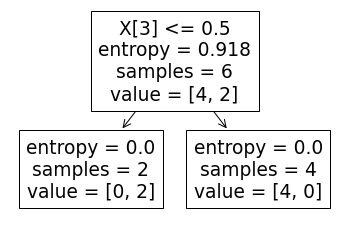

In [23]:
tree.plot_tree(dt_entropy)

# Step : 3 Create a Test set

In [31]:
df1=pd.read_csv("animal_text.csv")

# Step : 4 Perform prediction

In [38]:
y_pred_test=dt_entropy.predict(X_test)


In [39]:
y_pred_test

array(['Reptile', 'Mammal', 'Mammal', 'Mammal'], dtype=object)

# Step : 5 Build CART Decision Tree Model

In [40]:
dt_gini = DecisionTreeClassifier(criterion ="gini")
dt_gini.fit(X,y)

DecisionTreeClassifier()

In [46]:
y_pred_test=dt_gini.predict(X_test)

In [43]:
y_pred_test

array(['Reptile', 'Mammal', 'Mammal', 'Mammal'], dtype=object)

[Text(133.92000000000002, 181.2, 'X[3] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

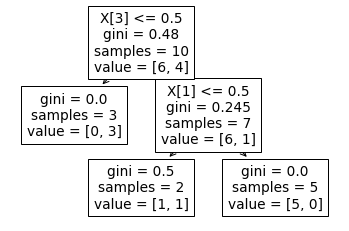

In [47]:
tree.plot_tree(dt_gini)

# Step6 : Build DT with Zoo dataset Using Entropy & Gini

In [49]:
zoo=pd.read_csv("zoo.data")

In [50]:
zoo

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [51]:
X=zoo.drop(['aardvark','1.7'],axis=1)

In [52]:
y=zoo['1.7'].values

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.33,random_state=0)
zoo_entropy = DecisionTreeClassifier(criterion ="entropy")
zoo_entropy.fit(X1_train,y1_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
y1_pred = zoo_entropy.predict(X1_test)

In [56]:
train_acc=zoo_entropy.predict(X1_train)
train_acc

array([1, 5, 1, 1, 2, 1, 1, 4, 3, 2, 6, 1, 2, 4, 2, 6, 1, 4, 4, 1, 1, 1,
       6, 4, 1, 6, 7, 2, 1, 1, 2, 3, 4, 2, 7, 7, 3, 2, 6, 1, 1, 7, 1, 2,
       2, 4, 2, 5, 4, 4, 1, 6, 1, 2, 7, 5, 2, 6, 2, 1, 1, 1, 6, 1, 1, 1,
       1], dtype=int64)

In [57]:
test_acc=zoo_entropy.predict(X1_test)
test_acc

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 4, 1, 2, 5, 4, 1, 1, 5,
       1, 1, 7, 1, 4, 2, 2, 7, 4, 7, 3], dtype=int64)

In [58]:
print("Train Accuracy:", accuracy_score(y1_train, zoo_entropy.predict(X1_train)))
print("Test Accuracy:", accuracy_score(y1_test, zoo_entropy.predict(X1_test)))

Train Accuracy: 1.0
Test Accuracy: 0.9090909090909091


In [59]:
acc = accuracy_score(y1_test, y1_pred)
print("Accuracy score :",acc)

Accuracy score : 0.9090909090909091


In [61]:
clf_report= classification_report(y1_test, y1_pred)
print("Classification report: ",clf_report)

Classification report:                precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           7       1.00      0.80      0.89         5

    accuracy                           0.91        33
   macro avg       0.90      0.87      0.85        33
weighted avg       0.93      0.91      0.91        33



[Text(148.8, 199.32, 'X[2] <= 0.5\nentropy = 2.439\nsamples = 67\nvalue = [25, 14, 3, 9, 3, 8, 5]'),
 Text(111.60000000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0, 0, 0, 0, 0, 0]'),
 Text(186.0, 163.07999999999998, 'X[1] <= 0.5\nentropy = 2.37\nsamples = 42\nvalue = [0, 14, 3, 9, 3, 8, 5]'),
 Text(148.8, 126.83999999999999, 'X[8] <= 0.5\nentropy = 2.177\nsamples = 28\nvalue = [0, 0, 3, 9, 3, 8, 5]'),
 Text(74.4, 90.6, 'X[9] <= 0.5\nentropy = 0.961\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 8, 5]'),
 Text(37.2, 54.359999999999985, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 4]'),
 Text(111.60000000000001, 54.359999999999985, 'X[12] <= 3.0\nentropy = 0.503\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 8, 1]'),
 Text(74.4, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(148.8, 18.119999999999976, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 8, 0]'),
 Text(223.20000000000002, 90.6, 'X[9] <= 0.5\nentropy = 1.371\ns

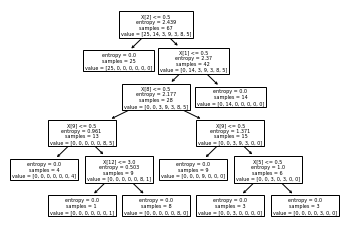

In [62]:
tree.plot_tree(zoo_entropy)

In [64]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.33,random_state=0)
zoo2_entropy = DecisionTreeClassifier(criterion ="gini")
zoo2_entropy.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [65]:
y2_pred = zoo2_entropy.predict(X2_test)

In [66]:
train_acc=zoo2_entropy.predict(X2_train)
train_acc

array([1, 5, 1, 1, 2, 1, 1, 4, 3, 2, 6, 1, 2, 4, 2, 6, 1, 4, 4, 1, 1, 1,
       6, 4, 1, 6, 7, 2, 1, 1, 2, 3, 4, 2, 7, 7, 3, 2, 6, 1, 1, 7, 1, 2,
       2, 4, 2, 5, 4, 4, 1, 6, 1, 2, 7, 5, 2, 6, 2, 1, 1, 1, 6, 1, 1, 1,
       1], dtype=int64)

In [67]:
test_acc=zoo2_entropy.predict(X2_train)
test_acc

array([1, 5, 1, 1, 2, 1, 1, 4, 3, 2, 6, 1, 2, 4, 2, 6, 1, 4, 4, 1, 1, 1,
       6, 4, 1, 6, 7, 2, 1, 1, 2, 3, 4, 2, 7, 7, 3, 2, 6, 1, 1, 7, 1, 2,
       2, 4, 2, 5, 4, 4, 1, 6, 1, 2, 7, 5, 2, 6, 2, 1, 1, 1, 6, 1, 1, 1,
       1], dtype=int64)

In [68]:
print("Train Accuracy:", accuracy_score(y2_train, zoo2_entropy.predict(X2_train)))
print("Test Accuracy:", accuracy_score(y2_test, zoo2_entropy.predict(X2_test)))

Train Accuracy: 1.0
Test Accuracy: 0.9393939393939394


In [69]:
acc = accuracy_score(y2_test, y2_pred)
print("Accuracy score :",acc)

Accuracy score : 0.9393939393939394


In [70]:
clf_report= classification_report(y2_test, y2_pred)
print("Classification report: ",clf_report)

Classification report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         0
           7       1.00      0.80      0.89         5

    accuracy                           0.94        33
   macro avg       0.79      0.76      0.75        33
weighted avg       0.98      0.94      0.95        33



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(260.40000000000003, 201.90857142857143, 'X[3] <= 0.5\ngini = 0.775\nsamples = 67\nvalue = [25, 14, 3, 9, 3, 8, 5]'),
 Text(223.20000000000002, 170.84571428571428, 'X[1] <= 0.5\ngini = 0.782\nsamples = 42\nvalue = [0, 14, 3, 9, 3, 8, 5]'),
 Text(186.0, 139.78285714285715, 'X[11] <= 0.5\ngini = 0.76\nsamples = 28\nvalue = [0, 0, 3, 9, 3, 8, 5]'),
 Text(148.8, 108.72, 'X[8] <= 0.5\ngini = 0.704\nsamples = 19\nvalue = [0, 0, 3, 0, 3, 8, 5]'),
 Text(74.4, 77.65714285714284, 'X[9] <= 0.5\ngini = 0.473\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 8, 5]'),
 Text(37.2, 46.59428571428572, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 4]'),
 Text(111.60000000000001, 46.59428571428572, 'X[12] <= 3.0\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 8, 1]'),
 Text(74.4, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(148.8, 15.531428571428563, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 8, 0]'),
 Text(223.20000000000002, 77.65714285714284, 'X[5] <

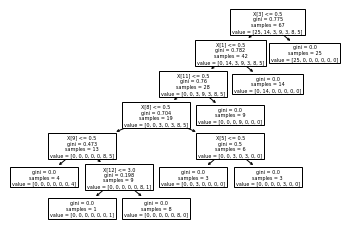

In [71]:
tree.plot_tree(zoo2_entropy)